### <i> Machine Learning-Based Prediction of CO2 Emissions in the U.S. </i>
#### <i> Dataset Link --> https://www.kaggle.com/datasets/alistairking/u-s-co2-emissions </i>
#### <i> import library Files </i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("emissions.csv")
df

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851
...,...,...,...,...,...
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59901 entries, 0 to 59900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         59901 non-null  int64  
 1   state-name   59901 non-null  object 
 2   sector-name  59901 non-null  object 
 3   fuel-name    59901 non-null  object 
 4   value        59901 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
df.describe()

,year,value
count,59901.000000,59901.000000
mean,1995.101067,35.647050
std,14.922049,207.883289
min,1970.000000,0.000022
25%,1982.000000,0.793179
50%,1995.000000,4.197628
75%,2008.000000,19.413459
max,2021.000000,5996.429314


In [5]:
import matplotlib.pyplot as plt

# Top 10 states by total CO2 emissions
state_emissions = df.groupby("state-name")["value"].sum().sort_values(ascending=False)
print("\nTop 10 States by CO2 Emissions:")
print(state_emissions.head(10))


Top 10 States by CO2 Emissions:
state-name
United States    1.067386e+06
Texas            1.194107e+05
California       7.222241e+04
Pennsylvania     5.537237e+04
Ohio             5.253161e+04
Illinois         4.621118e+04
New York         4.266316e+04
Indiana          4.135960e+04
Florida          4.081605e+04
Louisiana        3.981604e+04
Name: value, dtype: float64


### <i> Expolatory Data Analysis And Visulization </i>

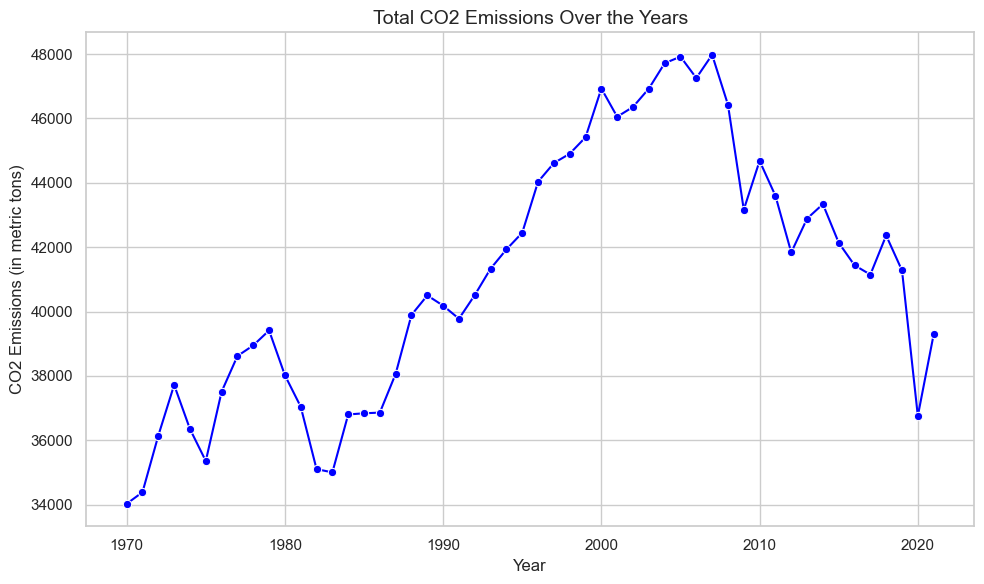

In [6]:
# Trend analysis: Total CO2 emissions over the years
yearly_emissions = df.groupby("year")["value"].sum()

# CO2 emissions by sector
sector_emissions = df.groupby("sector-name")["value"].sum().sort_values(ascending=False)

# CO2 emissions by fuel type
fuel_emissions = df.groupby("fuel-name")["value"].sum().sort_values(ascending=False)

# Visualizations
sns.set_theme(style="whitegrid")

#  Total CO2 emissions over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_emissions.index, y=yearly_emissions.values, marker="o", color="blue")
plt.title("Total CO2 Emissions Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (in metric tons)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


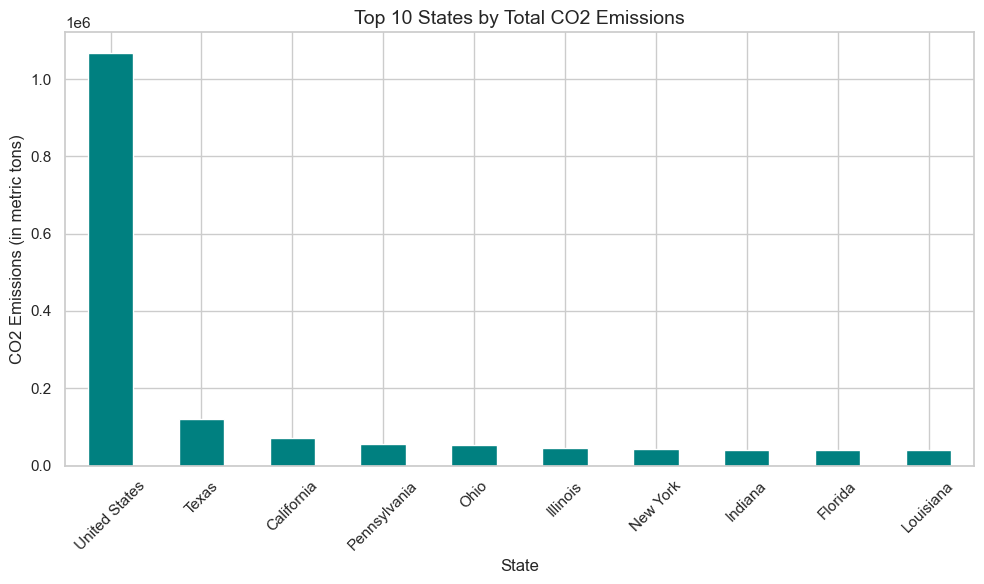

In [7]:
#  Top 10 states by total CO2 emissions
plt.figure(figsize=(10, 6))
state_emissions.head(10).plot(kind="bar", color="teal")
plt.title("Top 10 States by Total CO2 Emissions", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("CO2 Emissions (in metric tons)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

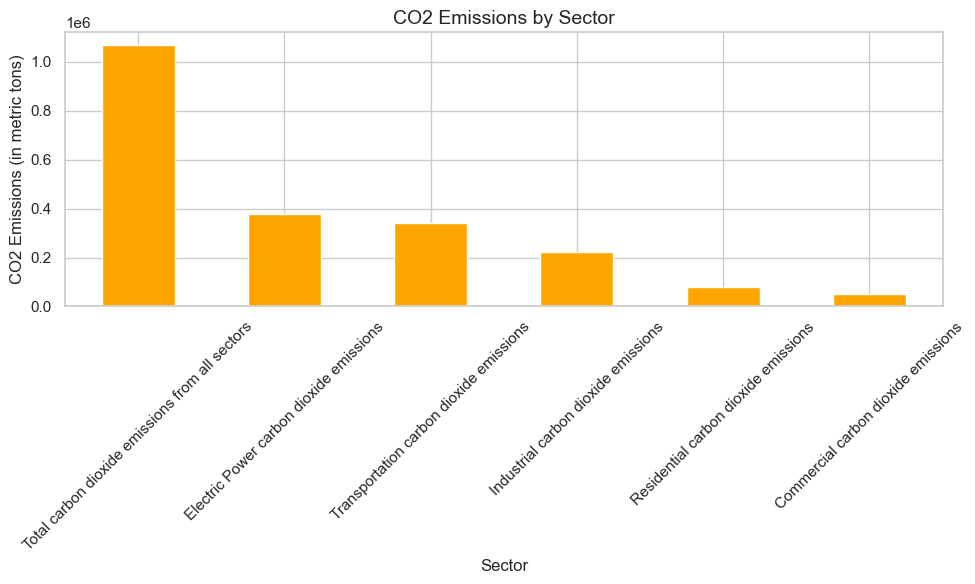

In [8]:
# CO2 emissions by sector
plt.figure(figsize=(10, 6))
sector_emissions.plot(kind="bar", color="orange")
plt.title("CO2 Emissions by Sector", fontsize=14)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("CO2 Emissions (in metric tons)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

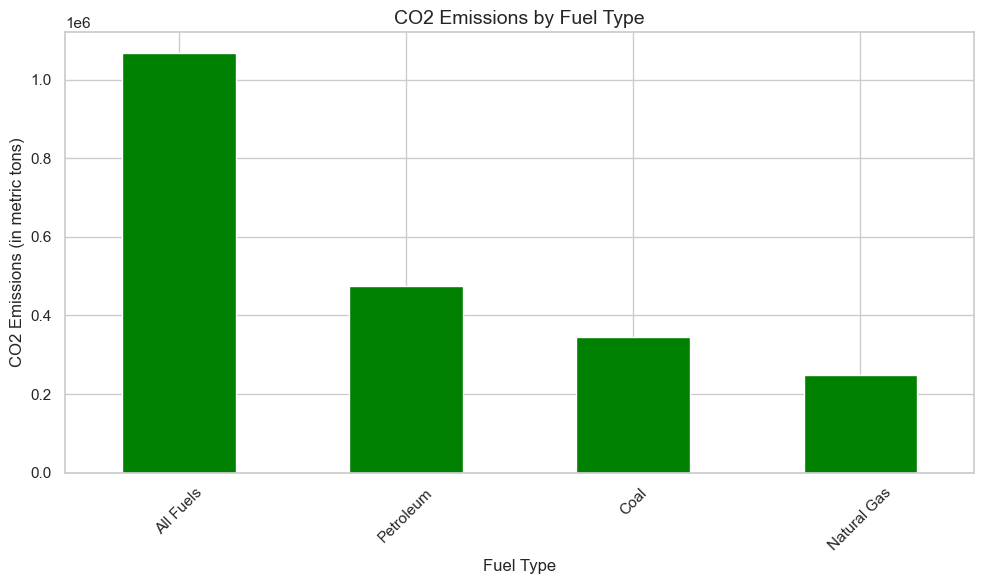

In [9]:
# 4. CO2 emissions by fuel type
plt.figure(figsize=(10, 6))
fuel_emissions.plot(kind="bar", color="green")
plt.title("CO2 Emissions by Fuel Type", fontsize=14)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions (in metric tons)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

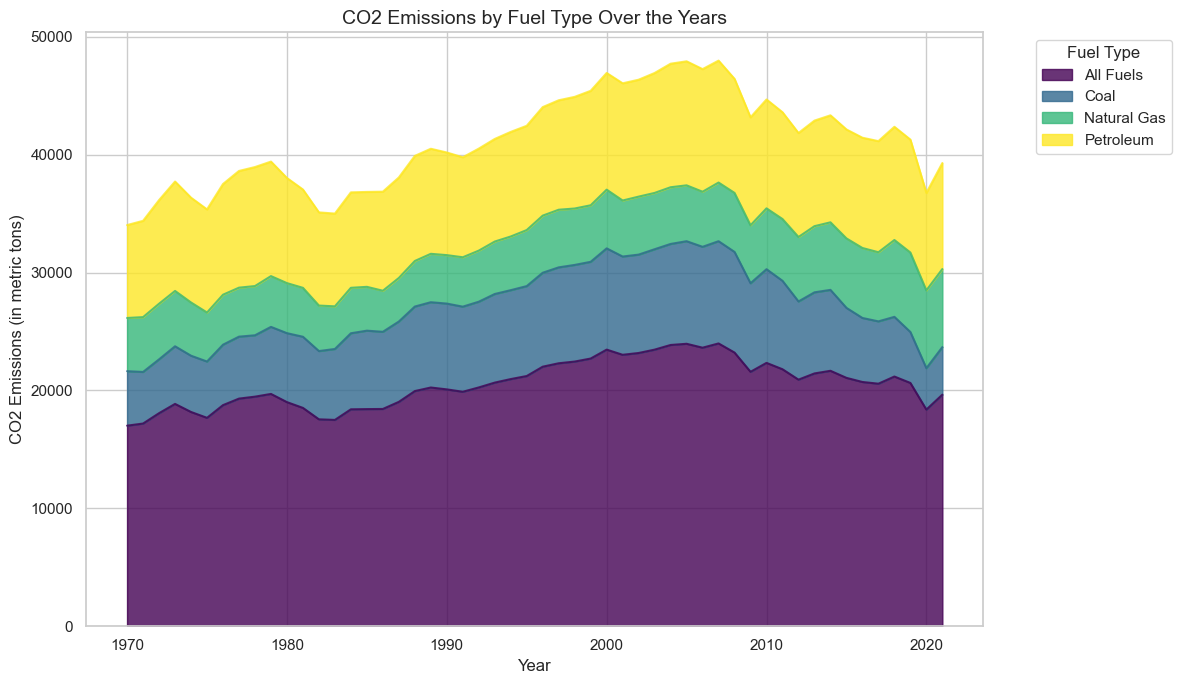

In [10]:
# 6. Stacked Area Plot: CO2 emissions by fuel type over the years
fuel_yearly_emissions = df.groupby(["year", "fuel-name"])["value"].sum().unstack()

plt.figure(figsize=(12, 7))
fuel_yearly_emissions.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8, figsize=(12, 7))
plt.title("CO2 Emissions by Fuel Type Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (in metric tons)", fontsize=12)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### <i> Data Preprocessing </i>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
# Create a classification target column (Low, Medium, High emissions)
thresholds = [df["value"].min(), df["value"].quantile(0.33), df["value"].quantile(0.66), df["value"].max()]
labels = ["Low", "Medium", "High"]
df["emission_category"] = pd.cut(df["value"], bins=thresholds, labels=labels, include_lowest=True)

# Drop unnecessary columns
df = df.drop(["value"], axis=1)

# Encode categorical variables
encoder = LabelEncoder()
df["state-name"] = encoder.fit_transform(df["state-name"])
df["sector-name"] = encoder.fit_transform(df["sector-name"])
df["fuel-name"] = encoder.fit_transform(df["fuel-name"])
df["emission_category"] = df["emission_category"].cat.codes  # Convert categories to numbers

# Features and target
X = df.drop("emission_category", axis=1)
y = df["emission_category"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.4713296052082464

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      3982
           1       0.39      0.23      0.29      3934
           2       0.50      0.62      0.55      4065

    accuracy                           0.47     11981
   macro avg       0.46      0.47      0.45     11981
weighted avg       0.46      0.47      0.45     11981


Confusion Matrix:
[[2220  573 1189]
 [1666  903 1365]
 [ 680  861 2524]]


### <i> RandomForest Classifier </i>

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Classifier Results:
Accuracy: 0.939237125448627

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3982
           1       0.91      0.91      0.91      3934
           2       0.96      0.96      0.96      4065

    accuracy                           0.94     11981
   macro avg       0.94      0.94      0.94     11981
weighted avg       0.94      0.94      0.94     11981


Confusion Matrix:
[[3765  200   17]
 [ 216 3588  130]
 [  20  145 3900]]


### <i> Support Vector Classifier </i>

In [15]:
from sklearn.svm import SVC

# Initialize the model
svm_clf = SVC(kernel="linear", random_state=42)

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Support Vector Machine (SVM) Results:
Accuracy: 0.45613888657040313

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.48      3982
           1       0.32      0.20      0.25      3934
           2       0.50      0.70      0.58      4065

    accuracy                           0.46     11981
   macro avg       0.43      0.45      0.43     11981
weighted avg       0.43      0.46      0.44     11981


Confusion Matrix:
[[1831  861 1290]
 [1538  797 1599]
 [ 358  870 2837]]


### <i> Comparison Of All Model </i>

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dictionary to store results
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, log_reg.predict(X_test)),  # Logistic Regression
        accuracy_score(y_test, rf_clf.predict(X_test)),  # Random Forest
        accuracy_score(y_test, svm_clf.predict(X_test)),  # SVM
    ],
    "Confusion Matrix": [
        confusion_matrix(y_test, log_reg.predict(X_test)),
        confusion_matrix(y_test, rf_clf.predict(X_test)),
        confusion_matrix(y_test, svm_clf.predict(X_test)),
    ],
    "Classification Report": [
        classification_report(y_test, log_reg.predict(X_test)),
        classification_report(y_test, rf_clf.predict(X_test)),
        classification_report(y_test, svm_clf.predict(X_test)),
    ],
}

# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Display the comparison
print("Model Comparison Results:")
print(results_df[["Model", "Accuracy"]])  # Display Accuracy


Model Comparison Results:
                 Model  Accuracy
0  Logistic Regression  0.471330
1        Random Forest  0.939237
2                  SVM  0.456139


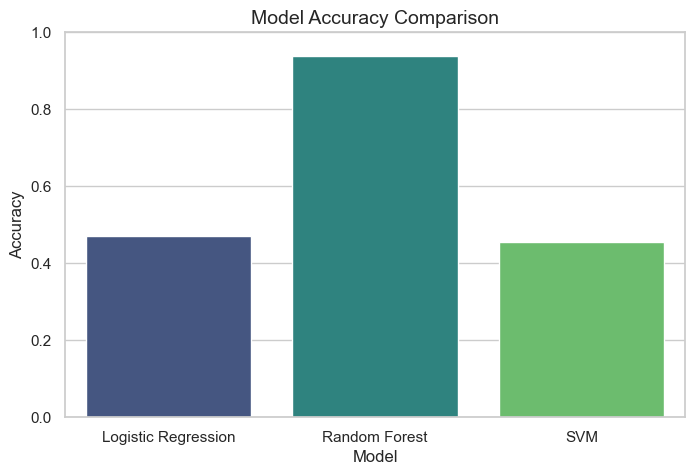

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=results["Model"], y=results["Accuracy"], palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)  # Accuracy range between 0 and 1
plt.show()
